#  Self-Study 4: Coupled Dynamics and Stability

In this self-study, we will explore the concepts of stability and coupled dynamics. A key part of our approach will involve using symbolic mathematics.

If you are not familiar with `sympy`, take a look at the notebook `sympy_basics.ipynb` for a quick introduction.
This notebook also contains examples on how to use `sympy` to compute the Jacobian matrix of a system of differential equations.

## Section 1: Fixed Points and Phase Portrait

In this section we will be looking at the dynamics of a system of ODEs with **two coupled** variables, $x$ and $y$.

$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - y^2 - xy
$$

You may recognize this as the competition dynamics we saw in Lecture 4.
The parameters $\alpha, \beta, \gamma, \delta$ are all positive constants.


### Task 1: Find the fixed points analytically (with `sympy`)


The fixed points are the points where the derivatives are zero.
In other words, if the system starts at such a point, it will remain fixed there unless perturbed.

In [2]:
from sympy import symbols, Eq, solve

# Declare variables, hint: use symbols()
x, y = symbols('x y')

alpha, beta, gamma, delta = symbols('alpha beta gamma delta')

# Define the equations for dx/dt and dy/dt

# Set up equations for fixed points
eq1 = alpha*x - beta*x**2 - gamma*x*y
eq2 = delta*y - y**2 - x*y

# Solve for fixed points
fixed_points = solve((Eq(eq1, 0), Eq(eq2, 0)), (x, y))
print(fixed_points)

[(0, 0), (0, delta), (alpha/beta, 0), ((alpha - delta*gamma)/(beta - gamma), (-alpha + beta*delta)/(beta - gamma))]


### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


Text(0.5, 1.0, 'Streamplot with Fixed Points')

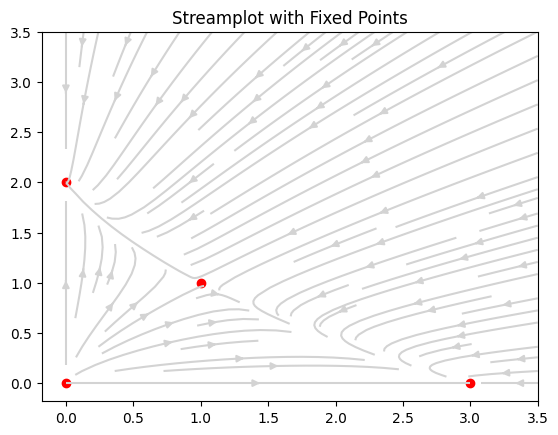

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical fixed points for the symbolic solutions you found earlier.
# You can start with these values (Slide 11), but feel free to change them to see what happens.

alpha_val = 3
beta_val = 1
gamma_val = 2
delta_val = 2

fixed_points_val = []
for x, y in fixed_points:
    # **Hint:** Look at the sympy documentation for the `subs` method
    
    x_temp = x.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})
    y_temp = y.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})
    fixed_points_val.append((float(x_temp), float(y_temp)))
    pass


# Step 2: Generate streamplot of the vector field defined by the equations above.
# **Hint:** Look at the matplotlib documentation for the `streamplot` function.
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))

# compute the vector field at the meshgrid points
U = alpha_val*X - beta_val*X**2 - gamma_val*X*Y
V = delta_val*Y - Y**2 - X*Y

# use plt.streamplot to plot
plt.streamplot(X, Y, U, V, color='lightgray')

# Step 3: Overlay fixed points onto the streamplot
plt.scatter(*zip(*fixed_points_val), color='red')
plt.title('Streamplot with Fixed Points')

## Section 2: Stability of Fixed Points

Using the same system as above, investigate the stability of the fixed points.

1. Find the fixed points of the system (i.e., Task 1 above).
1. Define the Jacobian matrix of the system.
2. Find its eigenvalues at each fixed point.
3. Determine the stability (see Lecture 4, Slide 12).

The Jacobian matrix is given by:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}
$$


In [45]:
# 1. Find Fixed Points (Same system as above)
x, y = symbols('x y')

# this time we will use explicit values for the parameters
alpha, beta, gamma, delta = 3, 1, 2, 2

f = alpha*x - beta*x**2 - gamma*x*y
g = delta*y - y**2 - x*y

fixed_points = solve((Eq(f, 0), Eq(g, 0)), (x, y))

print("Fixed points with explicit parameter values:")
print("alpha={}, beta={}, gamma={}, delta={}".format(alpha, beta, gamma, delta))

for each in fixed_points:
    print(each)


Fixed points with explicit parameter values:
alpha=3, beta=1, gamma=2, delta=2
(0, 0)
(0, 2)
(1, 1)
(3, 0)


In [38]:
# 2. Create the Jacobian Matrix
# Hint: use Matrix and diff from sympy to compute the Jacobian matrix
from sympy import diff, Matrix


# Define the Jacobian matrix
J = Matrix([[diff(f, x), diff(f, y)],
            [diff(g, x), diff(g, y)]])
J

Matrix([
[-2*x - 2*y + 3,         -2*x],
[            -y, -x - 2*y + 2]])

In [70]:
# 3. Compute eigenvalues for each fixed point 
eigenvalues = J.eigenvals()

eigenvalues_list = list(eigenvalues)


def evaluate_eigenvalues(eig_1, eig_2):
    #img cannot be zero so we set a threshold
    threshold = 1e-10
    
    eig_1_real = eig_1.real
    eig_1_imag = eig_1.imag
    eig_2_real = eig_2.real
    eig_2_imag = eig_2.imag
    
    #inefficient code but makes clearer and easier to understand the following part
    if abs(eig_1_imag) < threshold:
        eig_1_imag = 0
    if abs(eig_2_imag) < threshold:
        eig_2_imag = 0  
    if abs(eig_1_real) < threshold:
        eig_1_real = 0 
    if abs(eig_2_real) < threshold:
        eig_2_real = 0



    if eig_1_real == 0 and eig_2_real == 0:
        return "Center"

    #if real
    if eig_1_imag == 0 and eig_2_imag == 0:
        
        #same sign
        if eig_1_real * eig_2_real > 0:
            

            if eig_1_real > 0 and eig_2_real > 0:
                #unstable node
                if eig_1_real > 0:
                    return "Unstable Node"
                #stable node
            elif eig_1_real < 0:
                    return "Stable Node"
                
            #saddle
        elif eig_1_real *eig_2_real < 0:
                return "Saddle"
    elif eig_1_imag != 0 and eig_1_imag != 0 and eig_2_real and eig_2_imag != 0:
            if eig_1_real > 0 and eig_2_real > 0:
                return "Unstable Spiral"
            elif eig_1_real < 0 and eig_2_real < 0:
                return "Stable Spiral"
            


                
for x_val, y_val in fixed_points:
    eig_1 = complex(eigenvalues_list[0].subs({x: x_val, y: y_val}))
    eig_2 = complex(eigenvalues_list[1].subs({x: x_val, y: y_val}))
    behavior = evaluate_eigenvalues(eig_1, eig_2)    
    
    
    print(f"At fixed point ({x_val}, {y_val}): Eigenvalues: {eig_1}, {eig_2} ->: {behavior}")

At fixed point (0, 0): Eigenvalues: (2+0j), (3+0j) ->: Unstable Node
At fixed point (0, 2): Eigenvalues: (-2+0j), (-1+0j) ->: Stable Node
At fixed point (1, 1): Eigenvalues: (-2.414213562373095+0j), (0.41421356237309503+0j) ->: Saddle
At fixed point (3, 0): Eigenvalues: (-3+0j), (-1+0j) ->: Stable Node


## Section 3: An Application
In the **Goodwin model**, we saw how interactions between **employment** and **wages** can generate endogenous cycles — much like the predator–prey dynamics in biology.

We now explore a closely related system in an **economic–ecological context**, inspired by the same *Lotka–Volterra structure*:

1. **Resource ($r$)** — analogous to *prey* or *output capacity*, grows naturally at rate $a$ (e.g. grain, fish, or renewable input).
2. **Producers ($y$)** — analogous to *predators* or *firms*, consume the resource to produce output, facing an operating cost $c$.
3. **Interaction** — production (and resource depletion) occur at a rate $k$, proportional to both $r$ and $y$.

This leads to the coupled differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r - c y
$$

These equations have exactly the same *mathematical skeleton* as the Goodwin model — but now framed in terms of **resources and producers** rather than **workers and capitalists**.

### Task 1: Find the fixed points and the eigenvalues of the Jacobian matrix

What do we learn from these eigenvalues?

In [15]:
# 1. Declare variables as symbols
r, y = symbols('r y')

# 2. Define parameters
a, k, c = symbols('a k c')

# 3. Define the differential equations
eq1 = a*r - k*r*y
eq2 = k*r*y - c*y

# 4. Find Fixed Points
fixed_points = solve((Eq(eq1, 0), Eq(eq2, 0)), (r, y))

print("Fixed points:")
print(fixed_points)

print("\n")

# 5. Define the Jacobian matrix
Jacobian = Matrix([[diff(eq1, r), diff(eq1, y)],
            [diff(eq2, r), diff(eq2, y)]])

print("Jacobian matrix:")
print(Jacobian)
print("\n")

# 6. Compute eigenvalues at each fixed point
eigenvalues_Jacobian = Jacobian.eigenvals()

print("Eigenvalues of the Jacobian matrix:")
for x in eigenvalues_Jacobian:
    print(x)

#evaluate at fixed points
for point in fixed_points:
    J_at_point = Jacobian.subs({r: point[0], y: point[1]})
    eigenvals_at_point = J_at_point.eigenvals()
    print(f"\nAt fixed point {point}:")
    for val in eigenvals_at_point:
        print(val)

Fixed points:
[(0, 0), (c/k, a/k)]


Jacobian matrix:
Matrix([[a - k*y, -k*r], [k*y, -c + k*r]])


Eigenvalues of the Jacobian matrix:
a/2 - c/2 + k*r/2 - k*y/2 - sqrt(a**2 + 2*a*c - 2*a*k*r - 2*a*k*y + c**2 - 2*c*k*r - 2*c*k*y + k**2*r**2 - 2*k**2*r*y + k**2*y**2)/2
a/2 - c/2 + k*r/2 - k*y/2 + sqrt(a**2 + 2*a*c - 2*a*k*r - 2*a*k*y + c**2 - 2*c*k*r - 2*c*k*y + k**2*r**2 - 2*k**2*r*y + k**2*y**2)/2

At fixed point (0, 0):
a
-c

At fixed point (c/k, a/k):
-sqrt(-a*c)
sqrt(-a*c)


### Task 2: Plot the phase portrait

In [8]:
def lv_system(x, t, a, k, c):
    r, y = x
    dR_dt = a*r - k*r*y
    dY_dt = k*r*y - c*y

    
    
    return [dR_dt, dY_dt]

Text(0.5, 0, 'Time')

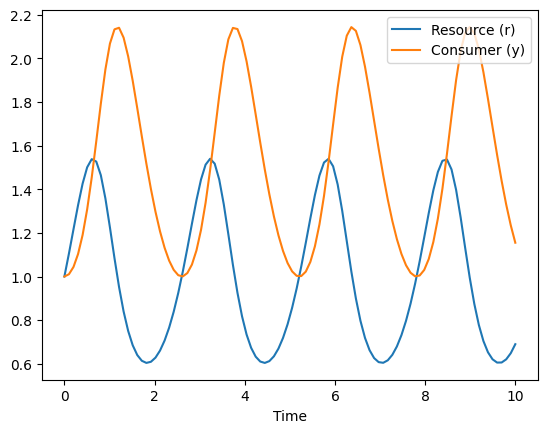

In [9]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 3
k = 2
c = 2
t = np.linspace(0, 10, 100)
sol = odeint(lv_system, [1, 1], t, args=(a, k, c))

r, y = sol.T
plt.plot(t, r, label='Resource (r)')
plt.plot(t, y, label='Consumer (y)')
plt.legend()
plt.xlabel('Time')

### Task 3: Adapt the model (Optional)

1. Given the base model, change it to include a new concept, e.g., consumers, multiple resources, etc.
2. Make a new phase portrait for the adapted model.
3. Describe how the changes affect the dynamics of the system.

### 2 producers with internal and externa competition
Each producer grows logistically on its own (a, b and c, d) but competes with the other through a shared interaction term k.
Depending on parameters, the system can show coexistence (both survive) or competitive exclusion (one outcompetes the other).

For both producers to coexist, we need:

$x^* > 0, \quad y^* > 0$.

This happens if:

- $b d - k^2 > 0$
- numerators $a d - c k >$ 0 and $c b - a k > 0$

(Numerators come from the formula to find equilibrium points x and y with derivatives = 0)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lv_system_modified(x, t, a, b, c, d, k):
    x, y = x
    dX_dt = a*x - b*x**2 - k*x*y
    dY_dt = c*y - d*y**2 - k*y*x
    
    return [dX_dt, dY_dt]


In [12]:
#parameter choice:
a = 0.4
b = 0.1
c = 0.25
d = 0.1
k = 0.05

In [13]:
# check parameters:
import numpy as np


den = b*d - k**2
xstar = (a*d - c*k) / den if den != 0 else None
ystar = (c*b - a*k) / den if den != 0 else None

print("denominator (b d - k^2) =", den)
print("equilibrium x* =", xstar)
print("equilibrium y* =", ystar)

denominator (b d - k^2) = 0.0075000000000000015
equilibrium x* = 3.666666666666667
equilibrium y* = 0.6666666666666662


Text(0.5, 0, '2 producers, internal and external competition')

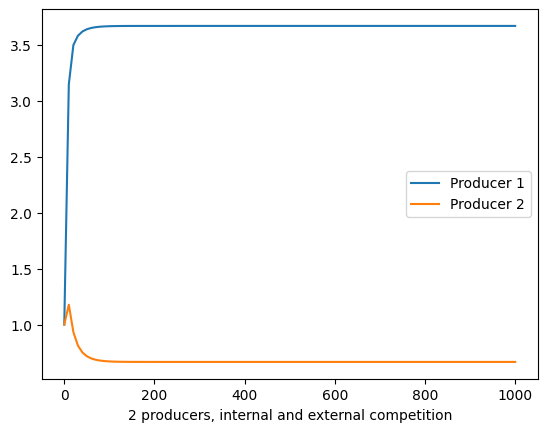

In [14]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 1000, 100)
sol = odeint(lv_system_modified, [1, 1], t, args=(a, b, c, d, k))

r, y = sol.T
plt.plot(t, r, label='Producer 1')
plt.plot(t, y, label='Producer 2')
plt.legend()
plt.xlabel('2 producers, internal and external competition')